In [10]:
#import data using pandas
import pandas as pd
df = pd.read_csv('global_power_plant_database.csv')

df.head()
df.info()

#lets create a copy

ggppd = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

C:\Users\User\AppData\Local\Temp\ipykernel_18300\355753382.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


In [11]:
#Identify missing values and handle them appropriately.

ggppd.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [ ]:
ggppd.drop_duplicates(inplace=True)


In [14]:
ggppd.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [16]:
#for the ease of analysis, we will drop the columns with missing values

ggppd.dropna(axis=1, inplace=True)


In [18]:
ggppd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   estimated_generation_note_2013  34936 non-null  object 
 9   estimated_generation_note_2014  34936 non-null  object 
 10  estimated_generation_note_2015  34936 non-null  object 
 11  estimated_generation_note_2016  34936 non-null  object 
 12  estimated_generation_note_2017  

In [19]:
ggppd.describe()

,capacity_mw,latitude,longitude
count,34936.000000,34936.000000,34936.000000
mean,163.355148,32.816637,-6.972803
std,489.636072,22.638603,78.405850
min,1.000000,-77.847000,-179.977700
25%,4.900000,29.256475,-77.641550
50%,16.745000,39.727750,-2.127100
75%,75.344250,46.263125,49.502675
max,22500.000000,71.292000,179.388700


In [32]:
import matplotlib.pyplot as plt

ggppd['country'].value_counts()


country
USA    9833
CHN    4235
GBR    2751
BRA    2360
FRA    2155
       ... 
GNB       1
LCA       1
PSE       1
SUR       1
ESH       1
Name: count, Length: 167, dtype: int64

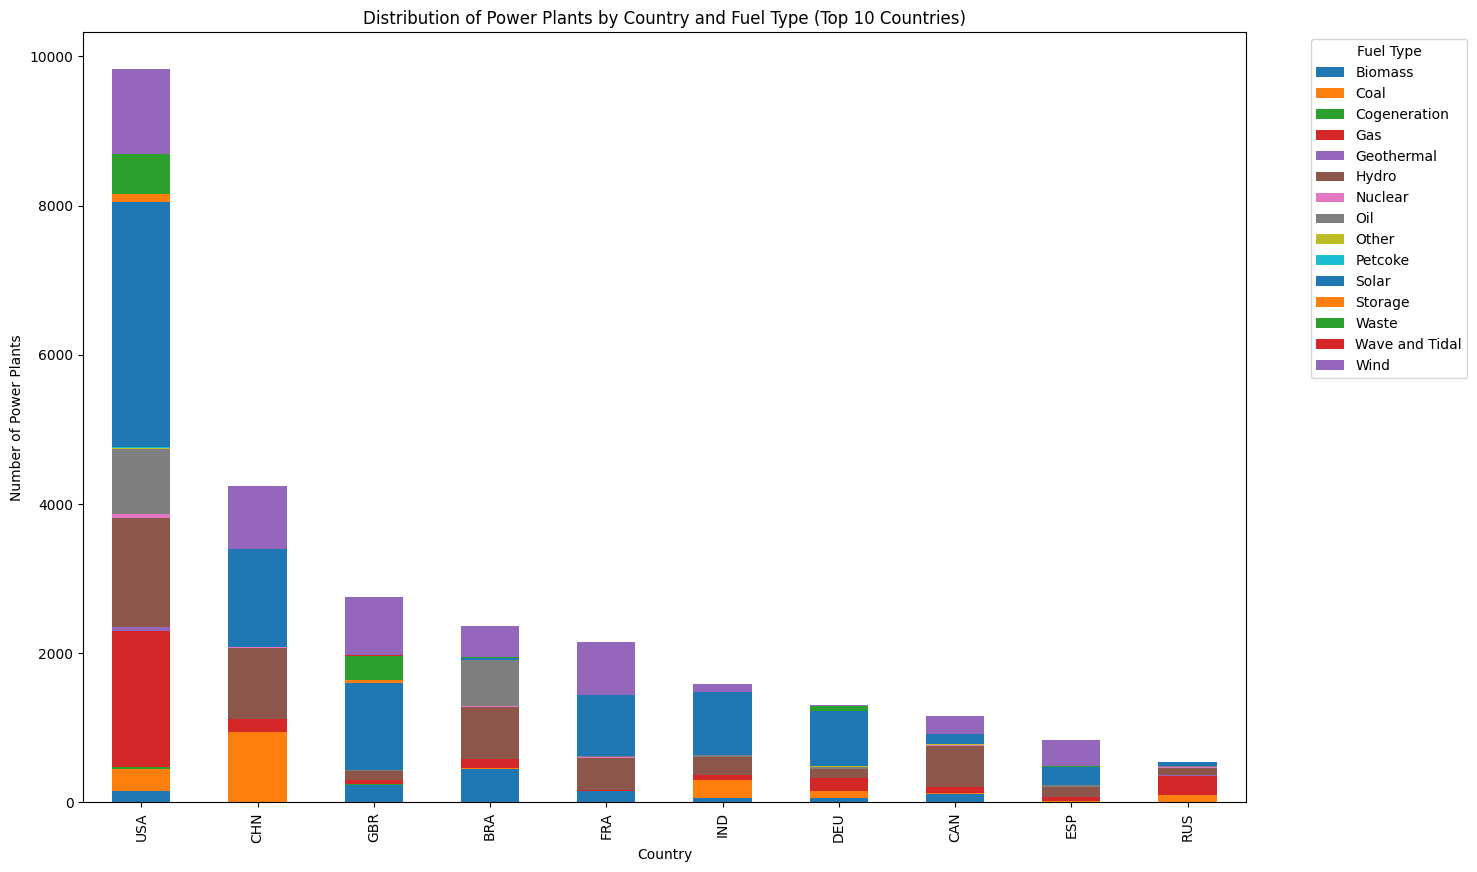

In [ ]:
#We will plot the top 10 countries.

country_fuel_distribution = ggppd.groupby(['country', 'primary_fuel']).size().unstack().fillna(0)

top10_countries = country_fuel_distribution.sum(axis=1).nlargest(10).index

top10_distribution = country_fuel_distribution.loc[top10_countries]

# Plot the distribution for the top 10 countries
top10_distribution.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Distribution of Power Plants by Country and Fuel Type (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:


import numpy as np
country_fuel_distribution_np = country_fuel_distribution.values
mean_output = np.mean(country_fuel_distribution_np, axis=0)
std_output = np.std(country_fuel_distribution_np, axis=0)
var_output = np.var(country_fuel_distribution_np, axis=0)

fuel_types = country_fuel_distribution.columns
stats_df = pd.DataFrame({
    'Fuel Type': fuel_types,
    'Mean': mean_output,
    'Standard Deviation': std_output,
    'Variance': var_output
})

print(stats_df)

         Fuel Type       Mean  Median  Standard Deviation      Variance
0          Biomass   8.562874     0.0           42.820408   1833.587364
1             Coal  13.952096     0.0           79.142697   6263.566567
2     Cogeneration   0.245509     0.0            2.674938      7.155294
3              Gas  23.940120     2.0          143.004531  20450.295816
4       Geothermal   1.131737     0.0            5.894838     34.749113
5            Hydro  42.850299     5.0          155.147009  24070.594356
6          Nuclear   1.167665     0.0            5.124384     26.259314
7              Oil  13.892216     1.0           83.131598   6910.862634
8            Other   0.257485     0.0            1.570553      2.466636
9          Petcoke   0.071856     0.0            0.851690      0.725376
10           Solar  63.862275     1.0          305.734532  93473.603786
11         Storage   0.808383     0.0            8.358677     69.867475
12           Waste   6.395210     0.0           49.065148   2407

In [ ]:
#FOR CHECKER

from scipy.stats import ttest_rel

# Perform a t-test to compare the mean power outpu differs significantly between differnet fuel types

t_stat, p_value = ttest_rel(mean_output[0], mean_output[1]) # Compare the mean power output between the biomass and Coal.


T-statistic: nan, P-value: nan


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1114: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1114: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


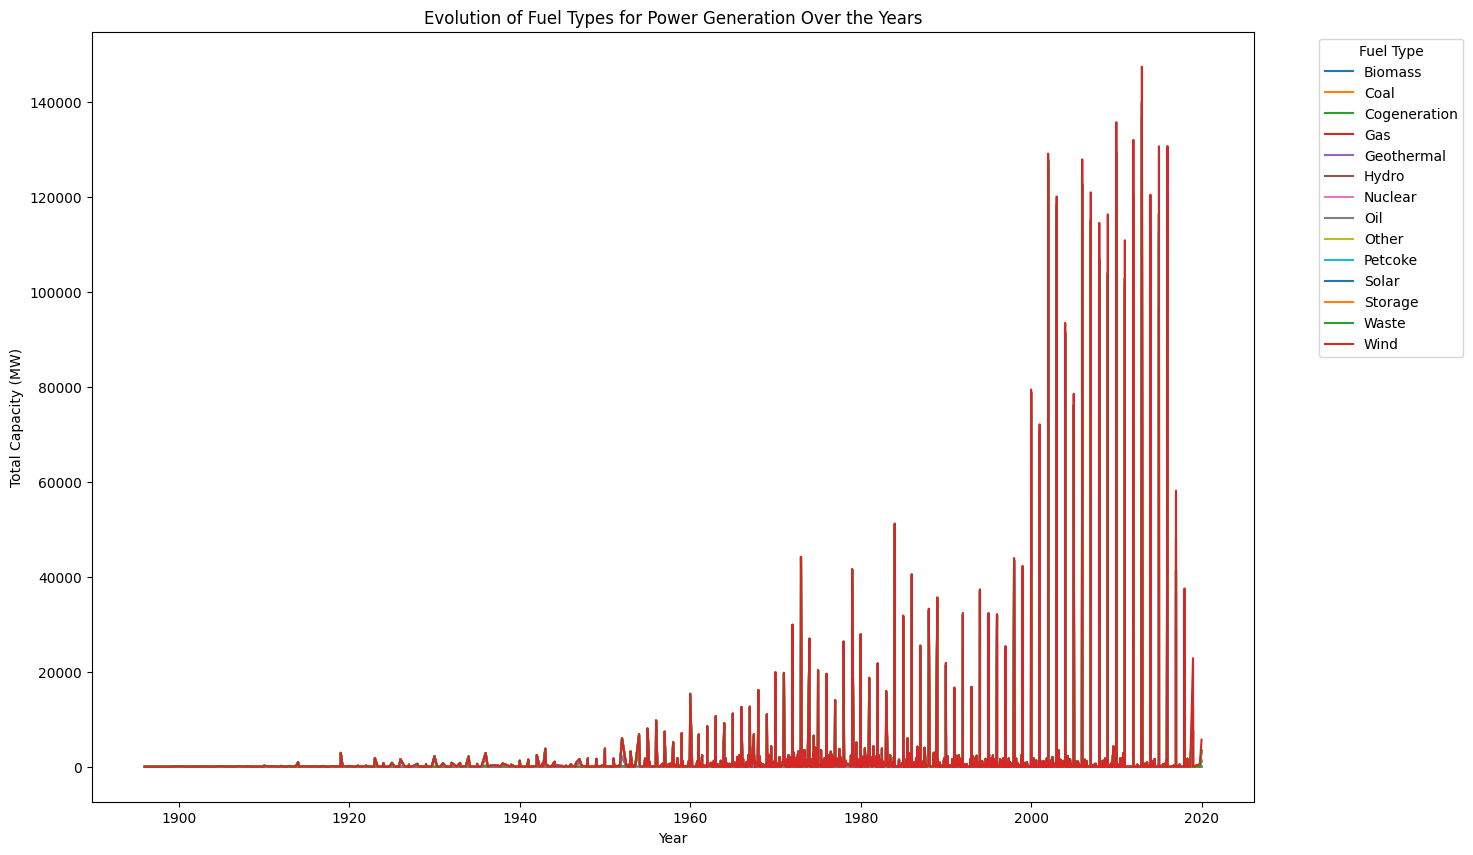

In [45]:
# Filter out rows with missing commissioning_year
df_filtered = df.dropna(subset=['commissioning_year'])

# Group by commissioning_year and primary_fuel, then sum the capacity
fuel_mix_over_years = df_filtered.groupby(['commissioning_year', 'primary_fuel'])['capacity_mw'].sum().unstack().fillna(0)

# Plot the data
fuel_mix_over_years.plot(kind='line', stacked=True, figsize=(15, 10))
plt.title('Evolution of Fuel Types for Power Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Capacity (MW)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

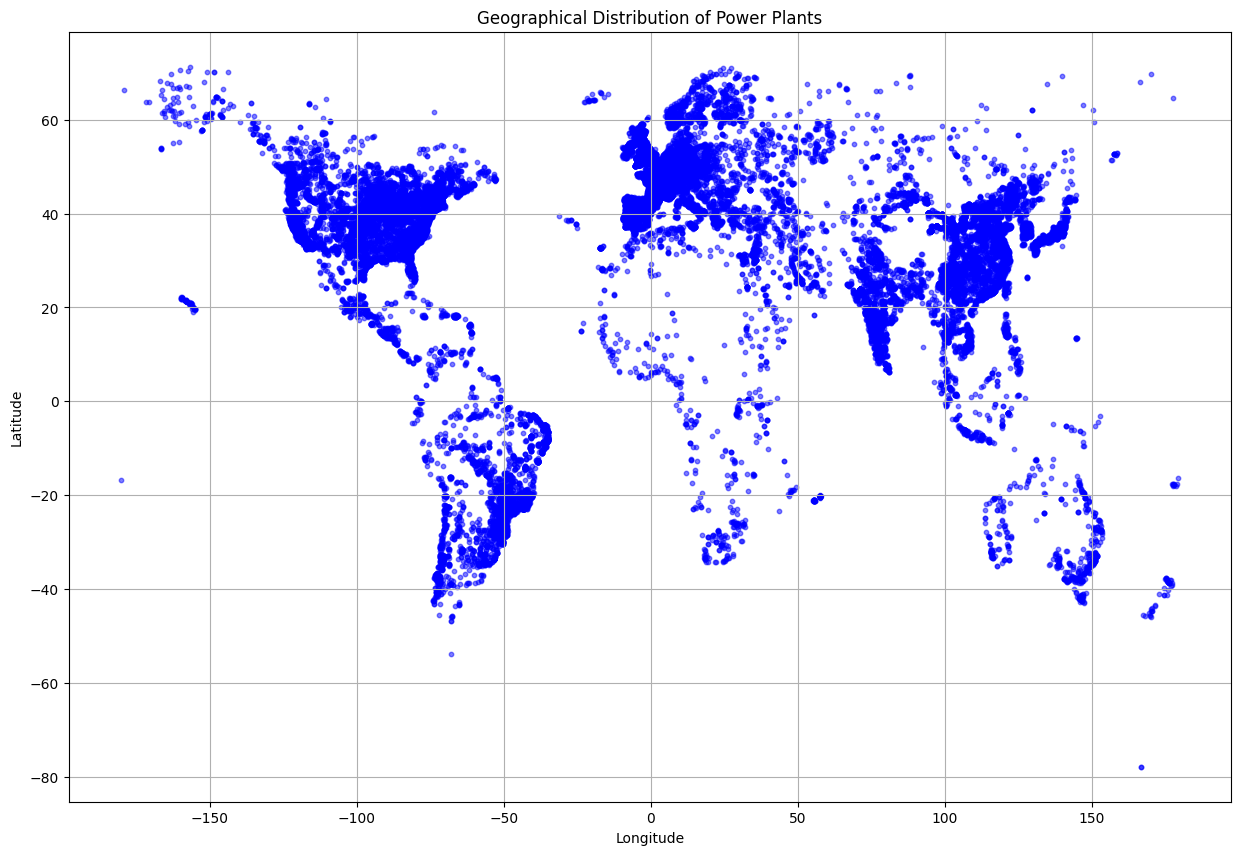

In [49]:
# Plot the geographical distribution of power plants
plt.figure(figsize=(15, 10))
plt.scatter(ggppd['longitude'], ggppd['latitude'], c='blue', alpha=0.5, s=10)
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [52]:
import numpy as np

fuel_types = ggppd['primary_fuel'].unique()
countries = ggppd['country'].unique()
capacities = ggppd['capacity_mw'].values
latitudes = ggppd['latitude'].values
longitudes = ggppd['longitude'].values

capacity_matrix = np.zeros((len(fuel_types), len(countries)))

for i, fuel in enumerate(fuel_types):
    for j, country in enumerate(countries):
        mask = (ggppd['primary_fuel'] == fuel) & (ggppd['country'] == country)
        capacity_matrix[i, j] = ggppd[mask]['capacity_mw'].sum()

# Display the results
print("Capacity Matrix (Fuel Type x Country):")
print(pd.DataFrame(capacity_matrix, index=fuel_types, columns=countries))


Capacity Matrix (Fuel Type x Country):
                   AFG     ALB      DZA     AGO  ATA        ARG     ARM  \
Hydro           238.55  1431.0     24.0  770.60  0.0   9999.710   965.0   
Solar            20.00     0.0    670.8    0.00  0.0    515.700     0.0   
Gas              42.00     0.0  15179.0  163.68  0.0  13041.840  1931.0   
Other             0.00    98.0      0.0    0.00  0.0   1324.460     0.0   
Oil               0.00     0.0      0.0  136.90  6.6   1199.289     0.0   
Wind              0.00     0.0      0.0    0.00  1.0    211.680     0.0   
Nuclear           0.00     0.0      0.0    0.00  0.0   1763.000   375.0   
Coal              0.00     0.0      0.0    0.00  0.0   4857.400     0.0   
Waste             0.00     0.0      0.0    0.00  0.0      0.000     0.0   
Biomass           0.00     0.0      0.0    0.00  0.0      0.000     0.0   
Wave and Tidal    0.00     0.0      0.0    0.00  0.0      0.000     0.0   
Petcoke           0.00     0.0      0.0    0.00  0.0      0.0